In [2]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [3]:
total = pd.read_csv('./data2/data_anal.csv')

# 함수들
1. 데이터 테이블 구축
2. barplot 그리기
3. 꺾은선 그래프 그리기
4. 교차점 있는 꺾은선 그래프 그리기

## 1.1. 데이터 테이블
### - get_table(df, x, y, nbins, minimum, maximum)

In [50]:
def get_table(df,x,y,nbins,minimum,maximum):
    ## bin 생성
    bins = []
    
    if df[x].min() >= minimum:
        minimum = df[x].min()
    else:
        bins.append(df[x].min())
    
    kk = 0
    if maximum > df[x].max():
        maximum = df[x].max()
        kk =1
    
    maxo = round(maximum+round(((maximum-minimum)/nbins),3),3)
    [bins.append(i) for i in np.arange(minimum,maxo,round(((maximum-minimum)/nbins),3))]
    
    if kk == 0:
        bins.append(df[x].max())
    
    print(bins)
    
    binsum = df.groupby(pd.cut(df[x], bins = bins)).size()
    
    
    
    pdf = df[df[y]=='Positive']
    pfreq = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()
    pprop = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()/binsum

    ndf = df[df[y]=='Negative']
    nfreq = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()
    nprop = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()/binsum

    ## x축 라벨 설정
    
    binsize = bins[2]-bins[1]
    
    labels= []
    if df[x].min() < minimum:
        labels.append('low_outlier')
    else:
        if abs(binsize//1) >= 1:
            labels.append('[' + str(int(bins[0])) +' , ' + str(int(bins[1])) + ']')
        else:
            rn = bins[2]//1+1
            labels.append('[' + str(round(bins[0],2)) +' , ' + str(round(bins[1],2)) + ']')
    if abs(binsize//1) >= 1:
        [labels.append('[' + str(int(bins[ind+1])) +' , ' + str(int(i)) + ']') for ind,i in enumerate(bins[2:-1])]
    else:
        [labels.append('[' + str(round(bins[ind+1],2)) +' , ' + str(round(i,2)) + ']') for ind,i in enumerate(bins[2:-1])]
    labels.append('high_outlier')
    print(labels)

    
    return_df = pd.DataFrame([nprop,pprop],index = ['Negative','Positive']).T
    return_df['bin_label'] = labels
    
    return_table = pd.DataFrame({'Frequency':binsum,'Positive' :pfreq,'Negative':nfreq})
    return_table[x] = labels
    return_table.set_index(x)
    
    
    return [return_df, return_table, nprop, pprop, bins]

## 1.2. 데이터 테이블 - bin 맘대로 조절
### - get_table2(df, x, y, temp_bins)

In [51]:
def get_table2(df,x,y,temp_bins):
    
    nbins = len(temp_bins)
    minimum = min(temp_bins)
    maximum = max(temp_bins)
    bins=[]
    if df[x].min() >= minimum:
        minimum = df[x].min()
    else:
        bins.append(df[x].min())
    [bins.append(i) for i in temp_bins]
#    maxo = round(maximum+round(((maximum-minimum)/nbins),3),3)
#    [bins.append(i) for i in np.arange(minimum,maxo,round(((maximum-minimum)/nbins),3))]
#    bins.append(maximum)
    bins.append(df[x].max())
    
    print(bins)
    
    binsum = df.groupby(pd.cut(df[x], bins = bins)).size()
    
    
    
    pdf = df[df[y]=='Positive']
    pfreq = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()
    pprop = pdf.groupby(pd.cut(pdf[x], bins = bins)).size()/binsum

    ndf = df[df[y]=='Negative']
    nfreq = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()
    nprop = ndf.groupby(pd.cut(ndf[x], bins = bins)).size()/binsum

    labels= []
    if df[x].min() < minimum:
        labels.append('low_outlier')
    else:
        labels.append('[' + str(round(bins[0],2)) +' , ' + str(round(bins[1],2)) + ']')
    
    [labels.append('[' + str(round(bins[ind+1],2)) +' , ' + str(round(i,2)) + ']') for ind,i in enumerate(bins[2:-1])]
    labels.append('high_outlier')
    print(labels)

    
    return_df = pd.DataFrame([nprop,pprop],index = ['Negative','Positive']).T
    return_df['bin_label'] = labels
    
    return_table = pd.DataFrame({'Frequency':binsum,'Positive' :pfreq,'Negative':nfreq})
    return_table[x] = labels
    return_table.set_index(x)
    
    
    return [return_df, return_table, nprop, pprop, bins]

## 2. 기초통계 막대 그래프 그리기
### - draw_freq(table,df,n,x,x_ko)

In [52]:
def draw_freq(table,df,n,x,x_ko):
    pal = sns.color_palette("Greens_d", len(table['Frequency']))
    rank = table['Frequency'].argsort().argsort()   

    sns.barplot(x= table.index,y = 'Frequency',data = table, palette=np.array(pal[::-1])[rank])
    xticks_pos = np.arange(len(table))

    plt.title('구간별 %s 빈도수'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('빈도수')
    
    xt = plt.xticks(xticks_pos, df['bin_label'], rotation=45)

    plt.savefig('./배송전략/%0.1f. %s 기술통계.png'%(n,x_ko), bbox_inches='tight' )


## 3.1. 상관관계 막대 그래프 그리기 
### - draw_bar_cor(df, n, x, x_ko)

In [53]:
def draw_bar_cor(df,n,x,x_ko):
    
    ax = df.plot.bar(stacked=True, color=['red','blue'],alpha=0.5)
    plt.title('%s에 따른 평점 상관관계'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')
    lab = ax.set_xticklabels(df['bin_label'], rotation=45)

    plt.savefig('./배송전략/%0.1f. %s에 따른 평점 상관관계_막대.png'%(n,x_ko), bbox_inches='tight')

## 3.2. 상관관계 꺾은선 그래프 그리기 
### - draw_line_cor(df, n, x, x_ko)

In [54]:
def draw_line_cor(df,n,x, x_ko):
    '''
    labels2 = []
    [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
    '''
    
    tick = [i for i in range(0,len(df),1)]
    if len(df) >= 10:
        labels2 = []
#        [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
        [labels2.append(i) if ind%2 == 0 else labels2.append('') for ind,i in enumerate(df['bin_label'].tolist())]
    else:
        labels2 = df['bin_label'].tolist()

    ax2 = df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
    ax2 = df['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)
    ax2.grid(True)
#   ax2.scatter(num1-(bins[num1]-int_x)/6 ,int_y, marker= 'o', c='purple', s=50)
    
    lab = ax2.set_xticklabels(labels2, rotation=45)

    plt.title('%s에 따른 평점 상관관계'%x_ko)
    plt.xlabel(x_ko)
    plt.legend()
    plt.ylabel('평점 비율')
    
    ax2.set_xticks(tick)
    
    lab2 = ax2.set_xticklabels(labels2, rotation=45)
    
    plt.savefig('./배송전략/%0.1f. %s에 따른 평점 상관관계_꺾은선.png'%(n,x_ko),bbox_inches = 'tight')
    plt.show()
    
    ax3 = df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
    ax3.grid(True)
    plt.title('%s에 따른 부정적 평점 비율'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')

    ax3.set_ylim(round((df['Negative'].min()-0.1),2),round((df['Negative'].max()+0.1),2))

    ax3.set_xticks(tick)
    
    lab2 = ax3.set_xticklabels(labels2, rotation=45)
    
    plt.savefig('./배송전략/%0.1f. %s에 따른 부정적 평점 비율.png'%(n,x_ko),bbox_inches = 'tight')
    plt.show()

## 3.3. 상관관계 꺾은선 그래프 with 교차점 그리기
### 3.3.1. - 교차점 그리기

In [55]:
def line_intersection(num1, num2, nprop, pprop, bins):

    line1 = [[bins[num1],nprop.iloc[num1]], [bins[num2],nprop.iloc[num2]]]
    line2 = [[bins[num1],pprop.iloc[num1]], [bins[num2],pprop.iloc[num2]]]
    
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    
    return x, y

### 3.3.2. - 교차점 & 꺾은선 그래프 그리기
### - draw_line_int_cor(df, bins, num1, int_x, n, x, x_ko)

In [56]:
import matplotlib.ticker as ticker

def draw_line_int_cor(df,bins,num1,int_x,n,x, x_ko):
    
        
    '''
    labels2 = [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
    labels2.insert(num1//2+1, round(int_x,2))'''
    
    ax2 = df['Negative'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='red', linewidth=2)
    ax2 = df['Positive'].plot.line(x ='bin_label',use_index=True, marker='o', markerfacecolor='purple', markersize=6, color='blue', linewidth=2, alpha=0.3)
    
    size_bin = bins[(num1+1)]-bins[num1]
    
    ax2.axvline(x = num1-(bins[num1]-int_x)/size_bin, ls= '--')
    
    ax2.scatter(num1-(bins[num1]-int_x)/size_bin ,int_y, marker= 'o', c='purple', s=50)
    ax2.grid(True)
    
    #ax2.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
    tick = [i for i in range(0,len(df),1)]
    tick.insert(num1//2+1,num1-(bins[num1]-int_x)/size_bin)

    ax2.set_xticks(tick)
    
    if len(df) >= 10:
        labels2 = []
#        [labels2.append(i) for i in df['bin_label'].tolist()[0::2]]
        [labels2.append(i) if ind%2 == 0 else labels2.append('') for ind,i in enumerate(df['bin_label'].tolist())]
        labels2.insert(num1//2+1, round(int_x,2))
    else:
        labels2 = df['bin_label'].tolist()
        labels2.insert(num1//2+1, round(int_x,2))
    
    lab = ax2.set_xticklabels(labels2, rotation=45)

    plt.title('%s에 따른 평점 상관관계'% x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')
    plt.legend()
    plt.savefig('./배송전략/%0.1f %s에 따른 평점 상관관계_꺾은선_교차점표시.png'%(n,x_ko),bbox_inches = 'tight')

## 4. 카테고리변수 일괄 함수
### - cat_all(df, x, y, n, x_ko)

In [57]:
def cat_all(df,x,y,n,x_ko):
    df_freq_table = pd.crosstab(index = df[x], columns= df[y], margins = True)
    
    df_prop_table = pd.crosstab(index = df[x], columns = df[y], margins = True).apply(lambda x : x/x['All'] , axis = 1).iloc[:-1,:-1]
    
    
    # df_prop_table = df_prop_table.sort_values('Negative',ascending=False)
    cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    
    if 'Monday' in df_freq_table.index:
        df_freq_table.index = pd.Categorical(df_freq_table.index, categories=cats, ordered=True)
        df_freq_table = df_freq_table.sort_index().iloc[1:,:]
        
        df_prop_table.index = pd.Categorical(df_prop_table.index, categories=cats, ordered=True)
        df_prop_table = df_prop_table.sort_index()
        
        df_prop_table2 = df_prop_table.sort_values('Negative',ascending=False)
        df_prop_table2.plot.bar(stacked=True, color=['red','blue'], alpha= .5)
        
        plt.title('%s에 따른 평점 상관관계'%x_ko)
        plt.xlabel(x_ko)
        plt.ylabel('평점 비율')
        plt.legend(loc=1)
        plt.savefig('./배송전략/%0.1f. %s(order) 따른 평점 상관관계_막대.png'%(n,x_ko),bbox_inches = 'tight')
        plt.show()
    elif 'Monday_time_1' in df_freq_table.index: 
        timecats = []
        for day in cats:
            for i in range(1,5):
                timecats.append(day+'_time_'+str(i))
        df_freq_table.index = pd.Categorical(df_freq_table.index, categories=timecats, ordered=True)
        df_freq_table = df_freq_table.sort_index().iloc[1:,:]
        df_prop_table.index = pd.Categorical(df_prop_table.index, categories=timecats, ordered=True)
        df_prop_table = df_prop_table.sort_index()
        df_prop_table2 = df_prop_table.sort_values('Negative',ascending=False)
        df_prop_table2.plot.bar(stacked=True, color=['red','blue'], alpha= .5)
        plt.title('%s에 따른 평점 상관관계'%x_ko)
        plt.legend(loc=1)
        plt.xlabel(x_ko)
        plt.ylabel('평점 비율')
        plt.savefig('./배송전략/%0.1f. %s(order) 따른 평점 상관관계_막대.png'%(n,x_ko),bbox_inches = 'tight')
        plt.show()
    
    pal = sns.color_palette("Greens_d", len(df_freq_table['All']))
    rank = df_freq_table['All'].argsort().argsort()   
    
    if 'All' in df_freq_table.index:
        sns.barplot(x= df_freq_table.index[:-1],y = df_freq_table['All'][:-1], data = df_freq_table, palette = np.array(pal[::-1])[rank])
    else:
        sns.barplot(x= df_freq_table.index,y = df_freq_table['All'], data = df_freq_table, palette = np.array(pal[::-1])[rank])

    plt.title('%s 빈도수'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('빈도수')
    plt.xticks(rotation=90)
    plt.savefig('./배송전략/%0.1f. %s 기초통계.png'%(n,x_ko), bbox_inches='tight' )
    plt.show()
    
    
    df_prop_table.plot.bar(stacked=True, color=['red','blue'], alpha= .5)
    plt.legend(loc=1)
    plt.title('%s에 따른 평점 상관관계'%x_ko)
    plt.xlabel(x_ko)
    plt.ylabel('평점 비율')
    plt.savefig('./배송전략/%0.1f. %s 따른 평점 상관관계_막대.png'%(n,x_ko),bbox_inches = 'tight')
    plt.show()
    return [df_freq_table, df_prop_table]

# [state 조합 테이블 생성]

In [58]:

cusstate = total['customer_state'].unique()
selstate = total['seller_state'].unique()
node1 = []
node2 = []
wgt = []
ngt = []
ngt_ratio = []
for sel in selstate:
    for cus in cusstate:
        node1.append(sel)
        node2.append(cus)
        freq = len(total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel))
        ngt_freq = len(total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel+
                                   "&" + '(pn_review_score == "%s")'%'Negative'))
        
        wgt.append(freq)
        ngt.append(ngt_freq)
        if freq==0:
            ngt_ratio.append(0)
        else:
            ngt_ratio.append(ngt_freq/freq)
        

In [13]:
state_cor = pd.DataFrame({ 'seller_state':node1,'customer_state':node2,'frequency':wgt,'negative_freq':ngt, 'negative_ratio':ngt_ratio })

In [14]:
state_cor.fillna('nan',inplace=True)

In [14]:
state_cor.head()

,seller_state,customer_state,frequency,negative_freq,negative_ratio
0,pr,pr,718,105,0.146240
1,pr,mg,797,164,0.205772
2,pr,es,121,18,0.148760
3,pr,sp,2652,527,0.198718
4,pr,rj,929,264,0.284177


## frequency 0 인 조합 제거 
> frequency 0인 것 = 208개 /594개

In [15]:
state_cor = state_cor[state_cor['frequency'] !=0]

In [23]:
2972/state_cor['frequency'].sum()

0.031962831915511435

In [17]:
state_cor.sort_values('frequency',ascending=False)

,seller_state,customer_state,frequency,negative_freq,negative_ratio
30,sp,sp,28990,6117,0.211004
31,sp,rj,8423,2578,0.306067
28,sp,mg,7349,1675,0.227922
35,sp,rs,3463,794,0.229281
27,sp,pr,2972,603,0.202894
84,mg,sp,2740,547,0.199635
3,pr,sp,2652,527,0.198718
32,sp,ba,2281,675,0.295923
33,sp,sc,2271,612,0.269485
82,mg,mg,1689,277,0.164002


In [283]:
state_cor.columns = ['seller_state','customer_state','Frequency','negative_freq','negative_ratio','comb']

# [frequency로 가중을 둔 directed weighted graph]

In [16]:
node_list = list(set().union(state_cor['customer_state'],state_cor['seller_state']))

In [18]:
edge_list = [(node1,node2,ratio) for node1, node2,ratio in zip(state_cor['seller_state'],state_cor['customer_state'],state_cor['frequency'])]

In [21]:
import networkx as nx
WG = nx.DiGraph()

WG.add_nodes_from(node_list)
WG.add_weighted_edges_from(edge_list)

WG.number_of_edges()

594

In [22]:
nx.write_graphml(WG, "state_graph_2202.graphml")

In [34]:
ad = nx.adjacency_matrix(WG)

In [120]:
np.set_printoptions(suppress=True)
admatrix = nx.to_numpy_matrix(WG)

## - frequency 시각화 heatmap 1

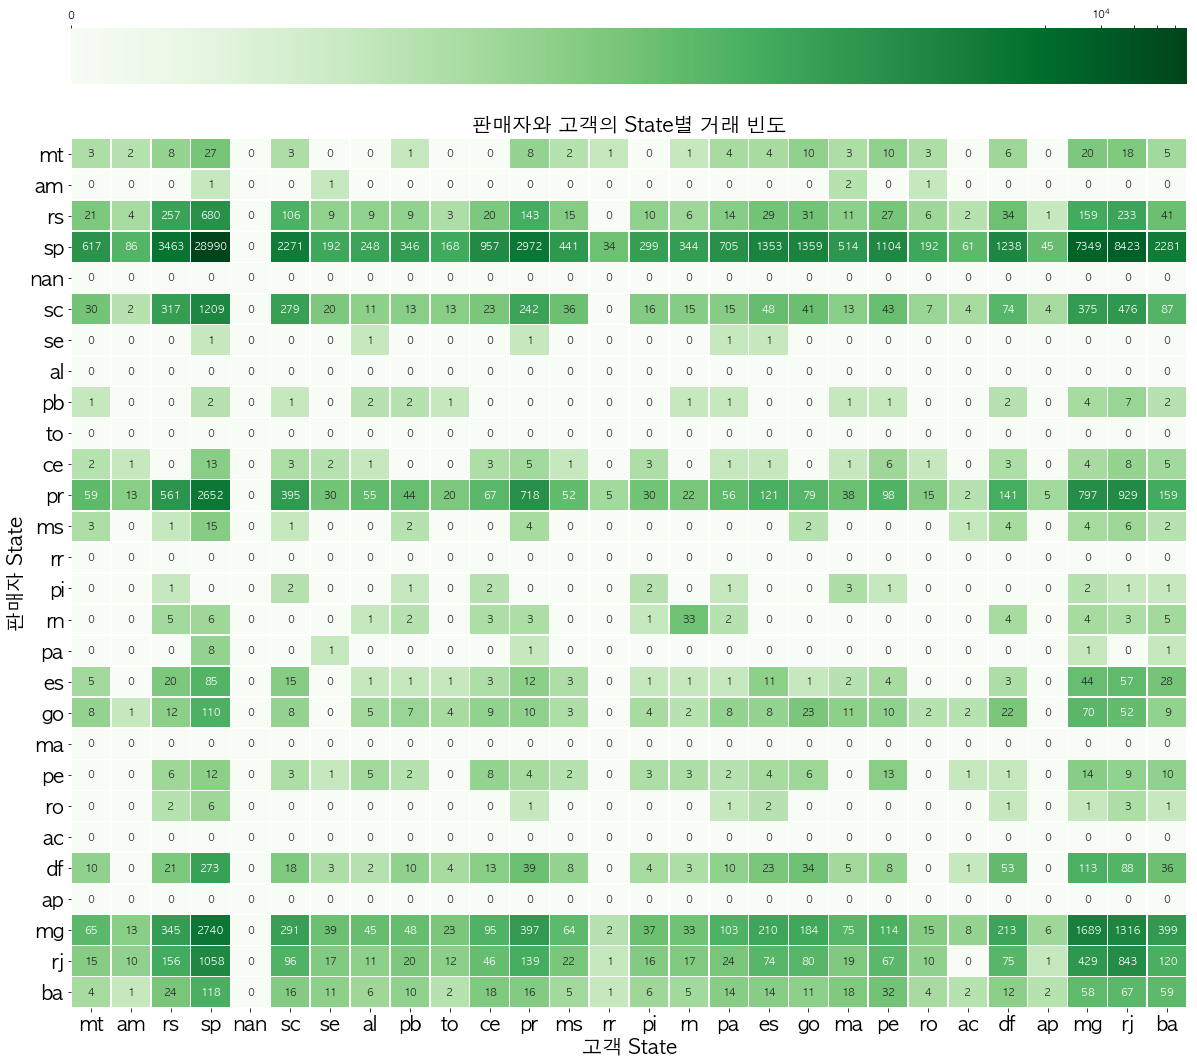

In [136]:
#
import matplotlib.colors as colors
plt.figure(figsize=(20,20))

ax = sns.heatmap(admatrix, annot=True,linewidth=0.5, cbar_kws = dict(use_gridspec=False,location="top"),cmap='Greens', fmt='g',
                 norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0))
ax.set_xticklabels(node_list, fontsize = 20)
ax.set_yticklabels(node_list,rotation=0, fontsize = 20)
plt.ylabel('판매자 State',fontsize=20)
plt.xlabel('고객 State',fontsize=20)
plt.title('판매자와 고객의 State별 거래 빈도',fontsize=20)
plt.savefig('State_State 거래 빈도.png', bbox_inches='tight' )
plt.show()


## frequency 시각화 heatmap 2

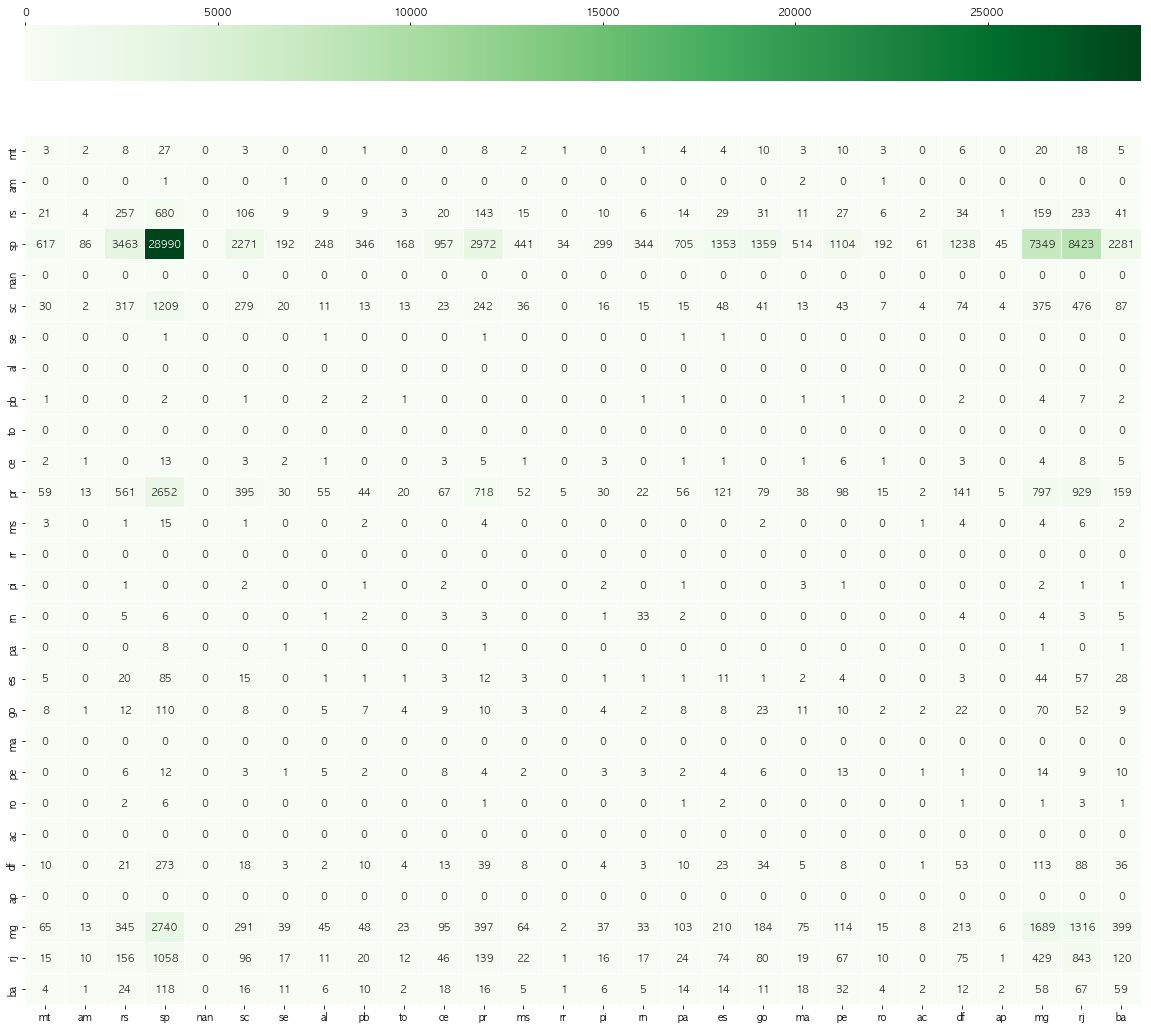

In [111]:

plt.figure(figsize=(20,20))

ax = sns.heatmap(ad2, annot=True,linewidth=0.1, cbar_kws = dict(use_gridspec=False,location="top"),cmap='Greens', fmt='g')
ax.set_xticklabels(node_list)
ax.set_yticklabels(node_list,rotation=90)

plt.show()

> 50개 이상인 것 개수 = 95개

In [29]:
len(state_cor[state_cor['frequency']>= 50])

95

In [39]:
state_cor['comb'] = state_cor['seller_state']+' , ' + state_cor['customer_state']

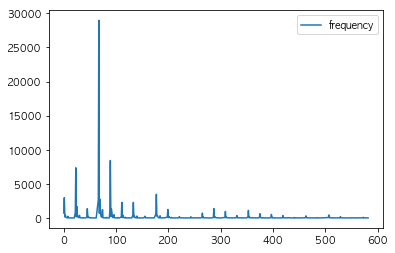

In [18]:
state_cor[['comb','frequency']].plot()

In [40]:
[st_df, st_table, st_nprop, st_pprop, st_bins] = get_table2(state_cor[['frequency','comb']],'frequency','comb', [0,5,10,50,100,500,1000,3000,5000])

[0, 5, 10, 50, 100, 500, 1000, 3000, 5000, 28990]
['[0 , 5]', '[5 , 10]', '[10 , 50]', '[50 , 100]', '[100 , 500]', '[500 , 1000]', '[1000 , 3000]', '[3000 , 5000]', 'high_outlier']


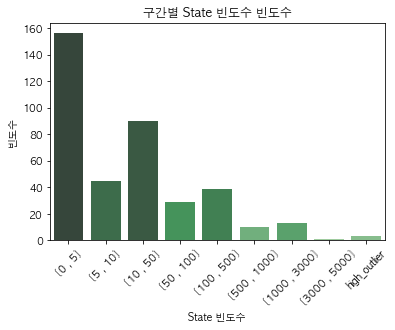

In [41]:
draw_freq(st_table,st_df,0,'frequency','State 빈도수')

# 1. 빈발 루트 

In [42]:
state1 = state_cor

In [43]:
state1.sort_values('frequency',ascending=False).head()

,seller_state,customer_state,frequency,negative_freq,negative_ratio,comb
30,sp,sp,28990,6117,0.211004,"sp , sp"
31,sp,rj,8423,2578,0.306067,"sp , rj"
28,sp,mg,7349,1675,0.227922,"sp , mg"
35,sp,rs,3463,794,0.229281,"sp , rs"
27,sp,pr,2972,603,0.202894,"sp , pr"


In [203]:
top_sel_list = state1.sort_values('frequency',ascending=False)['seller_state'].tolist()
top_cus_list = state1.sort_values('frequency',ascending=False)['customer_state'].tolist()

> ( 판매자 - 고객 )상위 5개 
### 1. (sp , sp) 2. (sp , rj) 3. (sp , mg) 4. (sp , rs) 5. (sp , pr)

In [38]:
def get_stdf(selstate, cusstate):
    return total[(total['seller_state']==selstate) & (total['customer_state']== cusstate)]

In [48]:
def route(top_sel_list, top_cus_list, case_num, num_top, x, y, nbins, minimum, maximum, x_ko):
    intersection_list = []
    for num in range(num_top):
        n = float('%d.'%case_num + str(int(num+1)))
        top = get_stdf(top_sel_list[num], top_cus_list[num])
        
        [top_df, top_table,top_nprop, top_pprop, top_bins] = get_table(top[[x,y]],x,y, nbins, minimum, maximum)
        
        draw_freq(top_table, top_df, n, x, '(%s, %s)의 %s'%(top_sel_list[num], top_cus_list[num], x_ko))
        plt.show()
        draw_line_cor(top_df, n, x, '(%s, %s)의 %s'%(top_sel_list[num], top_cus_list[num], x_ko))
        plt.show()
        
        top_nprop_list = top_nprop.tolist()
        top_pprop_list = top_pprop.tolist()
        
        num1 = 999
        for i in range(len(top_nprop_list)):
            if top_nprop_list[i] >= top_pprop_list[i]:
                num2 = i
                num1 = i-1
                break
        
        
        if num1 != 999:
            print(num1,num2)
            [int_x,int_y] = line_intersection(num1, num2, top_nprop, top_pprop, top_bins)
        
            intersection_list.append([int_x,int_y])
        
            draw_line_int_cor(top_df, top_bins, num1, int_x, n , x,'(%s, %s)의 %s'%(top_sel_list[num], top_cus_list[num], x_ko))
            plt.show()
        
    return intersection_list

[0.5465915938078704, 7.611591593807871, 14.67659159380787, 21.741591593807872, 28.806591593807873, 35.87159159380787, 42.93659159380787, 50.00159159380787, 160.90885570464118]
['[0 , 7]', '[7 , 14]', '[14 , 21]', '[21 , 28]', '[28 , 35]', '[35 , 42]', '[42 , 50]', 'high_outlier']


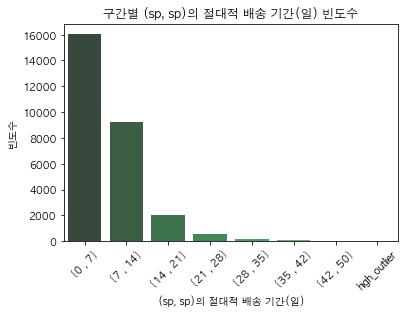

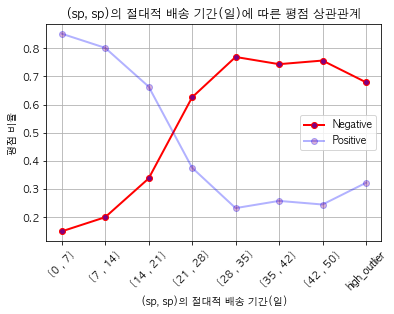

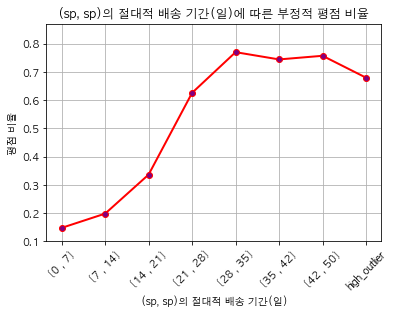

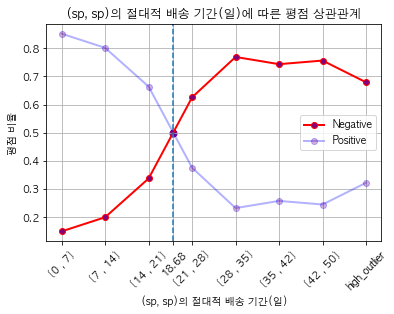

[1.287569960648148, 8.246569960648149, 15.205569960648148, 22.16456996064815, 29.12356996064815, 36.08256996064815, 43.041569960648154, 50.00056996064815, 208.35177054384255]
['[1 , 8]', '[8 , 15]', '[15 , 22]', '[22 , 29]', '[29 , 36]', '[36 , 43]', '[43 , 50]', 'high_outlier']


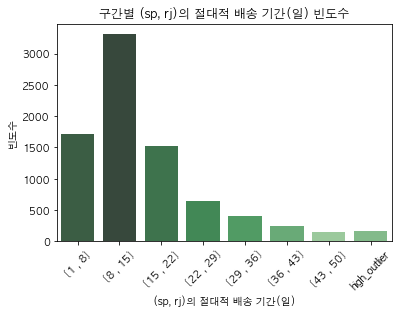

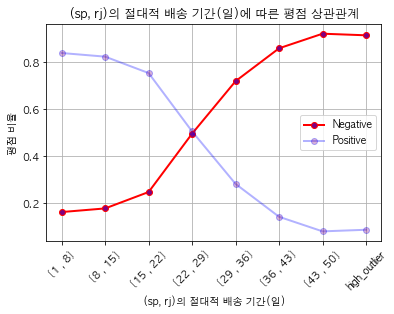

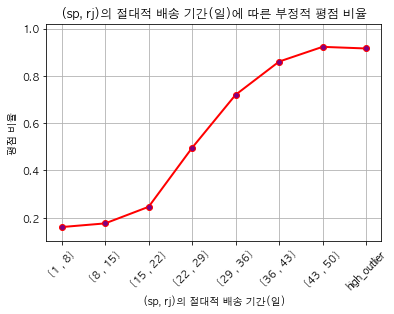

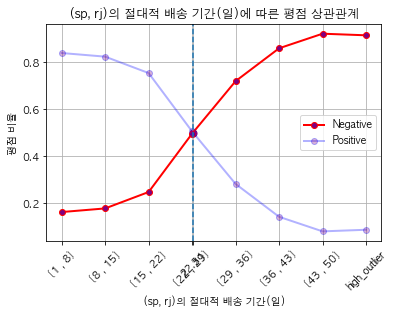

[1.1541963485532407, 8.13219634855324, 15.11019634855324, 22.08819634855324, 29.06619634855324, 36.04419634855324, 43.02219634855324, 50.00019634855324, 187.74384702410882]
['[1 , 8]', '[8 , 15]', '[15 , 22]', '[22 , 29]', '[29 , 36]', '[36 , 43]', '[43 , 50]', 'high_outlier']


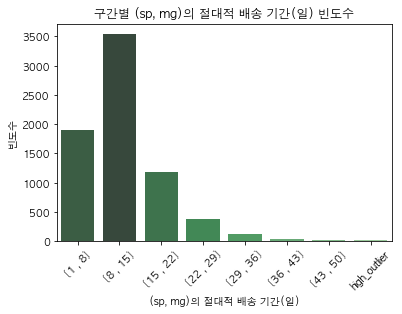

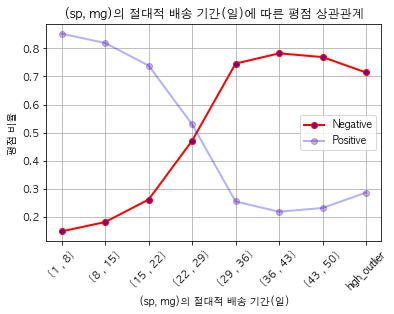

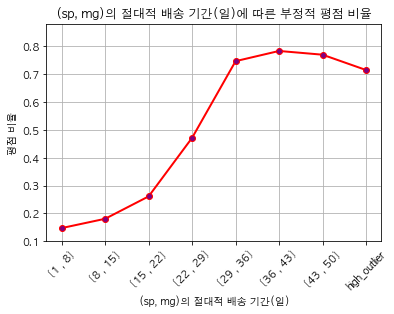

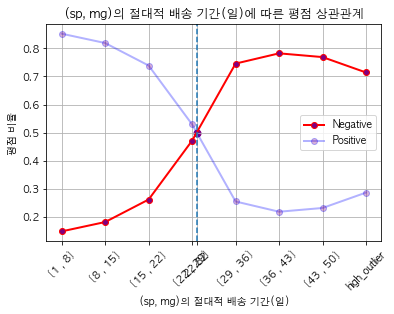

[3.1552101906134267, 9.847210190613428, 16.539210190613428, 23.23121019061343, 29.923210190613432, 36.61521019061343, 43.30721019061343, 49.99921019061343, 56.69121019061343, 186.23677307340282]
['[3 , 9]', '[9 , 16]', '[16 , 23]', '[23 , 29]', '[29 , 36]', '[36 , 43]', '[43 , 49]', '[49 , 56]', 'high_outlier']


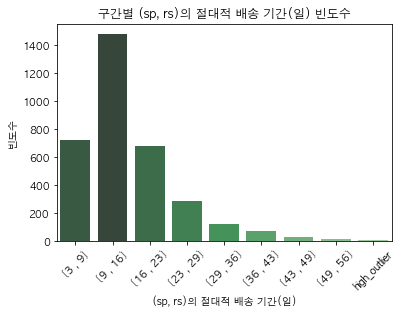

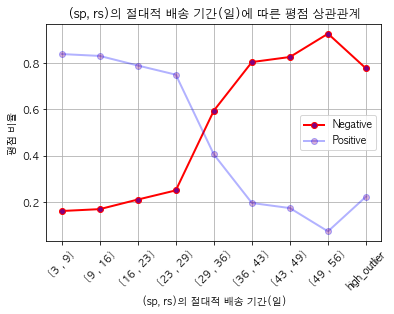

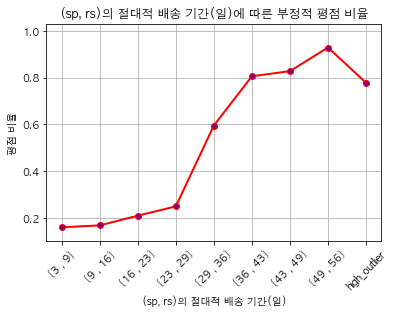

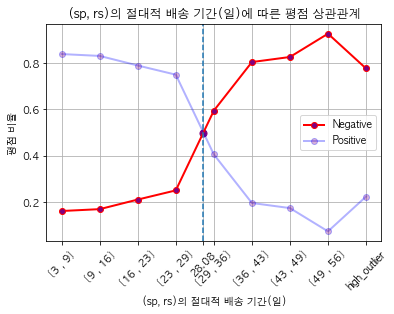

[2.1038446505787043, 8.945844650578703, 15.787844650578702, 22.6298446505787, 29.4718446505787, 36.3138446505787, 43.1558446505787, 49.9978446505787, 56.8398446505787, 97.46850718444445]
['[2 , 8]', '[8 , 15]', '[15 , 22]', '[22 , 29]', '[29 , 36]', '[36 , 43]', '[43 , 49]', '[49 , 56]', 'high_outlier']


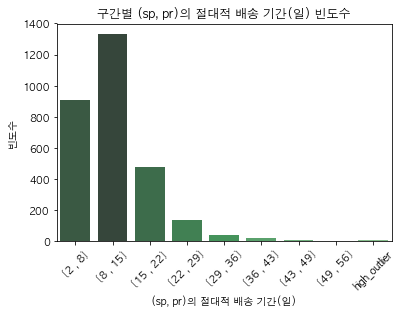

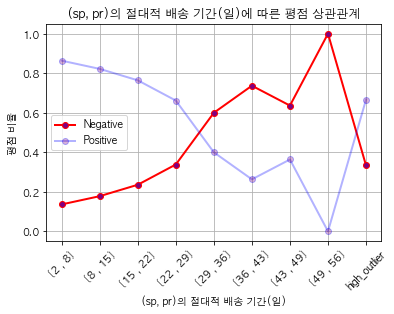

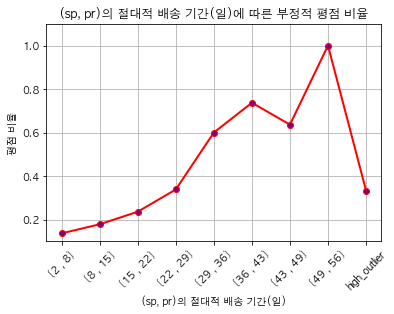

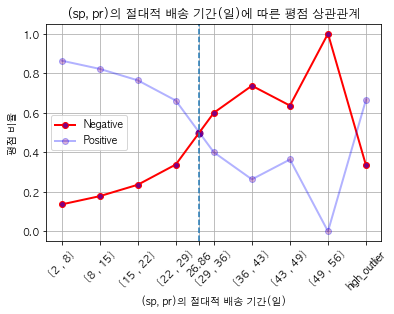

[0.8907536518634259, 7.906753651863426, 14.922753651863426, 21.93875365186343, 28.954753651863427, 35.970753651863426, 42.98675365186343, 50.00275365186343, 106.34656011421295]
['[0 , 7]', '[7 , 14]', '[14 , 21]', '[21 , 28]', '[28 , 35]', '[35 , 42]', '[42 , 50]', 'high_outlier']


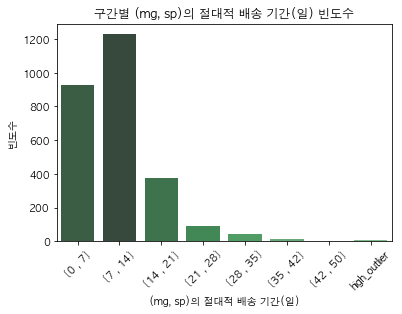

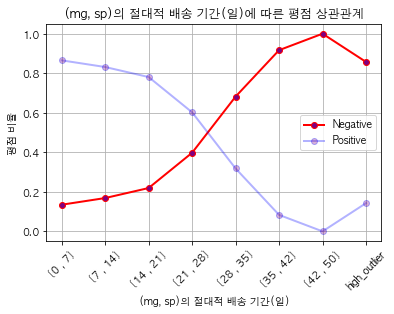

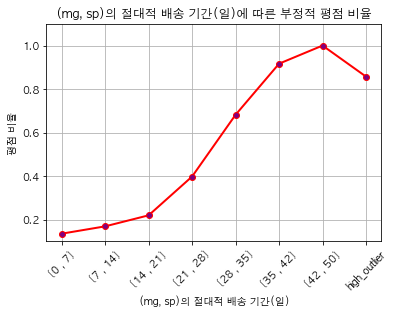

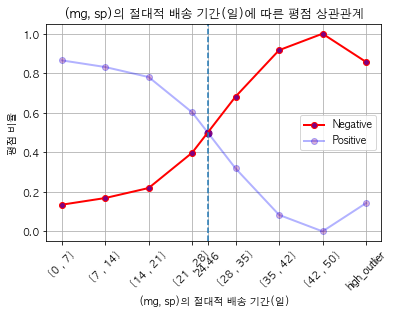

[1.8085108606018518, 8.692510860601852, 15.57651086060185, 22.46051086060185, 29.34451086060185, 36.228510860601844, 43.112510860601844, 49.996510860601845, 56.880510860601845, 88.78427972054398]
['[1 , 8]', '[8 , 15]', '[15 , 22]', '[22 , 29]', '[29 , 36]', '[36 , 43]', '[43 , 49]', '[49 , 56]', 'high_outlier']


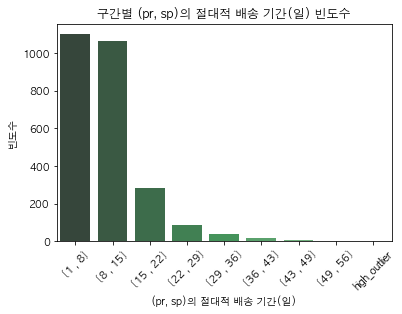

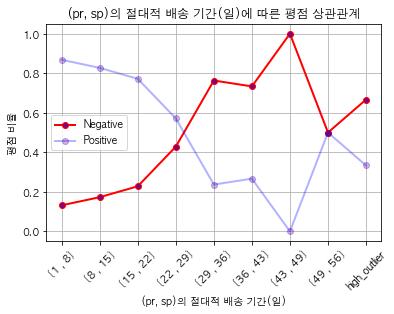

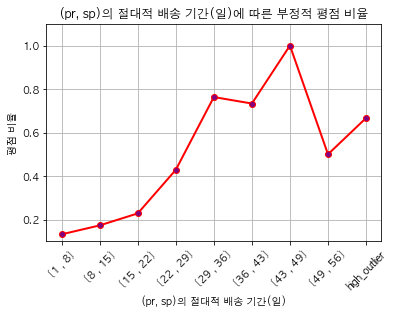

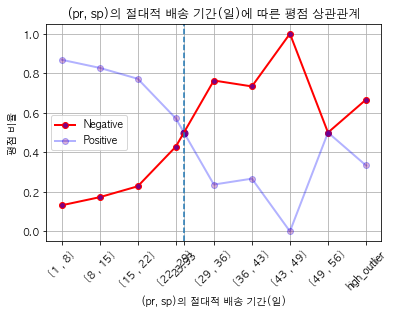

[0.8634365693865741, 7.883436569386574, 14.903436569386573, 21.923436569386574, 28.943436569386574, 35.963436569386566, 42.98343656938657, 50.00343656938657, 170.21919879635416]
['[0 , 7]', '[7 , 14]', '[14 , 21]', '[21 , 28]', '[28 , 35]', '[35 , 42]', '[42 , 50]', 'high_outlier']


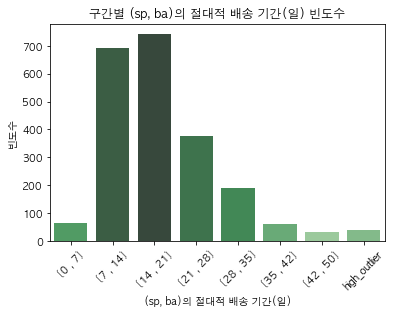

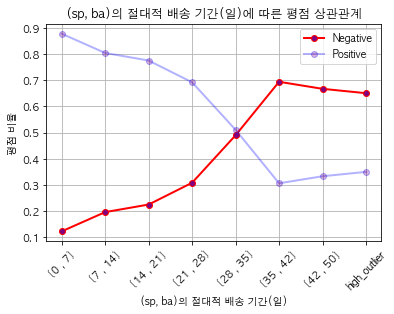

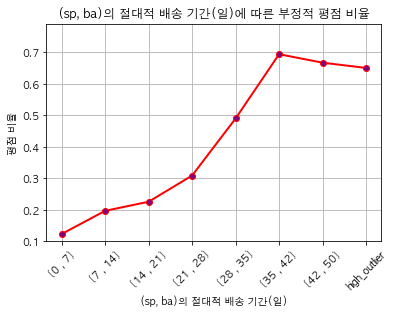

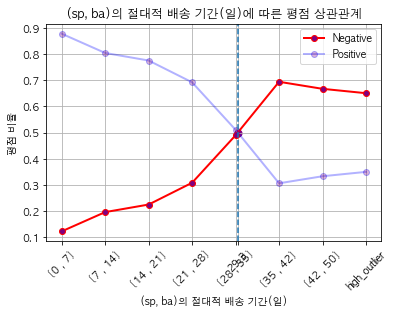

[1.8695162489236108, 8.745516248923611, 15.621516248923612, 22.49751624892361, 29.37351624892361, 36.24951624892361, 43.12551624892361, 50.001516248923615, 77.4737945190162]
['[1 , 8]', '[8 , 15]', '[15 , 22]', '[22 , 29]', '[29 , 36]', '[36 , 43]', '[43 , 50]', 'high_outlier']


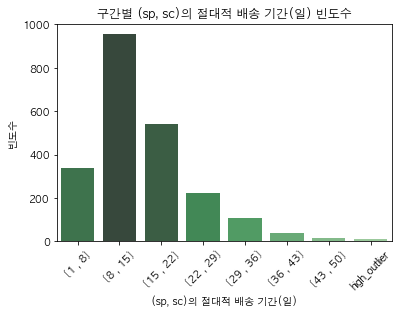

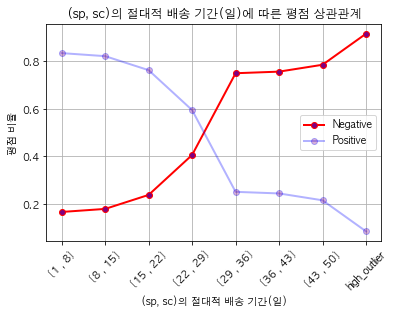

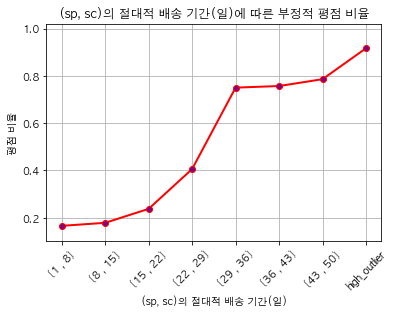

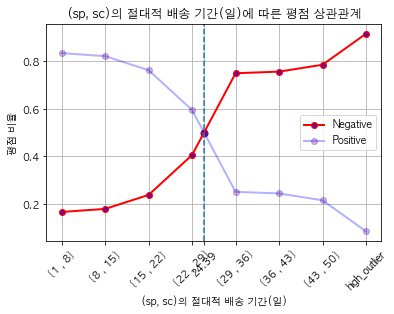

[1.0355044654050929, 8.030504465405093, 15.025504465405094, 22.020504465405093, 29.015504465405094, 36.01050446540509, 43.00550446540509, 50.00050446540509, 117.15189590393518]
['[1 , 8]', '[8 , 15]', '[15 , 22]', '[22 , 29]', '[29 , 36]', '[36 , 43]', '[43 , 50]', 'high_outlier']


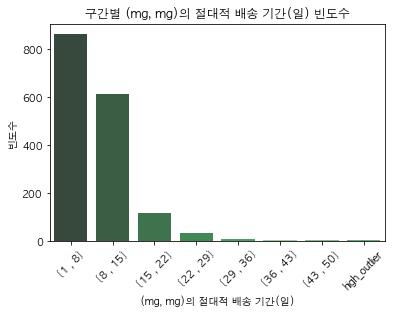

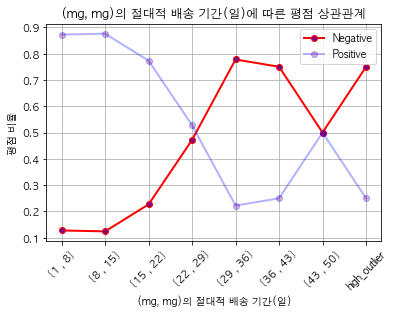

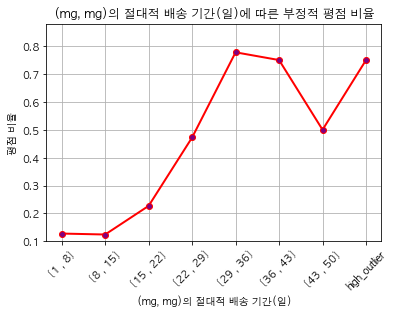

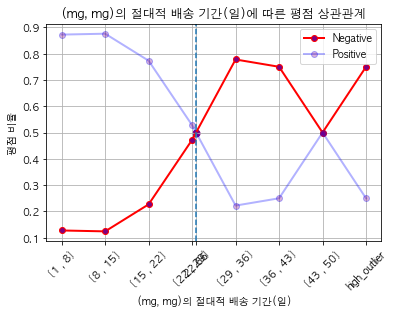

In [168]:
int_list = route(10,'del_period','pn_review_score',7,0,50,'절대적 배송 기간(일)')

In [155]:
[print(i) for i in int_list]

[18.675847157342925, 0.5000000000000001]
[22.308189097608757, 0.5]
[22.822778453976298, 0.5]
[28.08457912346614, 0.5000000000000001]
[26.858046897769707, 0.5]


[None, None, None, None, None]

In [170]:
state1.sort_values('negative_ratio',ascending=False).head(10)

,seller_state,customer_state,frequency,negative_freq,negative_ratio,comb
420,es,pb,1,1,1.0,"es , pb"
266,mt,ms,2,2,1.0,"mt , ms"
417,es,pa,1,1,1.0,"es , pa"
296,ce,am,1,1,1.0,"ce , am"
432,ro,pr,1,1,1.0,"ro , pr"
282,ce,pa,1,1,1.0,"ce , pa"
433,ro,mg,1,1,1.0,"ro , mg"
498,se,pa,1,1,1.0,"se , pa"
486,se,pr,1,1,1.0,"se , pr"
570,am,sp,1,1,1.0,"am , sp"


In [165]:
temp = state1[state1['frequency']>=30]

In [164]:
state1['frequency'].describe()

count      386.000000
mean       240.888601
std       1620.305795
min          1.000000
25%          2.000000
50%         10.000000
75%         47.500000
max      28990.000000
Name: frequency, dtype: float64

In [166]:
temp.sort_values('negative_ratio', ascending=False)

,seller_state,customer_state,frequency,negative_freq,negative_ratio,comb
259,mt,pe,10,6,0.600000,"mt , pe"
174,ba,pa,14,8,0.571429,"ba , pa"
150,df,pb,10,5,0.500000,"df , pb"
356,pe,ba,10,5,0.500000,"pe , ba"
172,ba,se,11,5,0.454545,"ba , se"
7,pr,al,55,23,0.418182,"pr , al"
177,ba,pb,10,4,0.400000,"ba , pb"
233,sc,mt,30,12,0.400000,"sc , mt"
235,sc,rn,15,6,0.400000,"sc , rn"
132,rj,ro,10,4,0.400000,"rj , ro"


# 2. 배송 기한 이행 여부

## [state2 조합 테이블 생성]

In [26]:

cusstate = total['customer_state'].unique()
selstate = total['seller_state'].unique()
node1 = []
node2 = []
wgt = []
ngt = []
ngt_ratio = []


ndead = []
ydead = []
sumdead = []
ndead_ratio = []

for sel in selstate:
    for cus in cusstate:
        node1.append(sel)
        node2.append(cus)
        freq = len(total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel))
        ngt_freq = len(total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel+
                                   "&" + '(pn_review_score == "%s")'%'Negative'))
        ## 배송 기한 준수 여부 관련 
        df = total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel)
        ydead_freq = len(df.query('del_period_deadline_yn == True'))
        ndead_freq = len(df.query('del_period_deadline_yn == False'))
        sumdead_freq = len(df)
        
        wgt.append(freq)
        ngt.append(ngt_freq)
        
        
        if freq==0:
            ngt_ratio.append(0)
        else:
            ngt_ratio.append(ngt_freq/freq)
        
        
        ## 배송 기한 준수 여부 관련
        ydead.append(ydead_freq)
        ndead.append(ndead_freq)
        sumdead.append(sumdead_freq)
        if sumdead_freq==0:
            ndead_ratio.append(0)
        else:
            ndead_ratio.append(ndead_freq/sumdead_freq)
         

In [27]:
state2 = pd.DataFrame({ 'seller_state':node1,'customer_state':node2,'frequency':wgt,'negative_freq':ngt, 'negative_ratio':ngt_ratio,'ydead_freq':ydead, 'ndead_freq':ndead,'sumdead_freq':sumdead,'ndead_ratio':ndead_ratio })

In [211]:
state2['ndead_ratio'].describe()

count    386.000000
mean       0.101611
std        0.162201
min        0.000000
25%        0.000000
50%        0.054054
75%        0.145089
max        1.000000
Name: ndead_ratio, dtype: float64

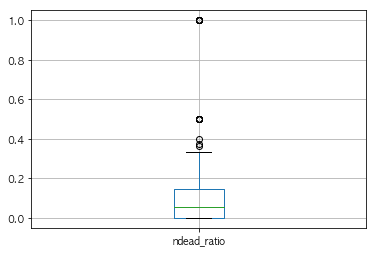

In [213]:
state2[['ndead_ratio']].boxplot()

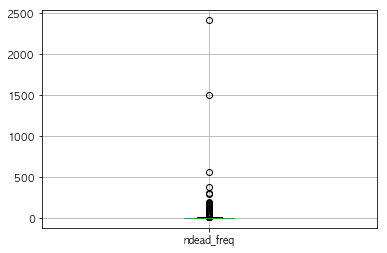

In [223]:
state2[['ndead_freq']].boxplot()

In [227]:
state2[['ndead_freq']].describe()

,ndead_freq
count,386.000000
mean,24.116580
std,151.657164
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,2413.000000


In [230]:
state2 = state2[state2['frequency']!= 0 ]

### - frequency > 10 (50%)

In [256]:

state2_dead = state2[state2['frequency'] > 10].sort_values('ndead_ratio',ascending=False)

In [257]:
top_sel_list_dead = state2_dead.sort_values('ndead_ratio',ascending=False)['seller_state'].tolist()
top_cus_list_dead = state2_dead.sort_values('ndead_ratio',ascending=False)['customer_state'].tolist()

In [239]:
state2_dead.head()

,seller_state,customer_state,frequency,negative_freq,negative_ratio,ydead_freq,ndead_freq,sumdead_freq,ndead_ratio
7,pr,al,55,23,0.418182,35,20,55,0.363636
70,rs,pe,27,8,0.296296,20,7,27,0.259259
34,sp,al,248,87,0.350806,185,63,248,0.254032
168,ba,sc,16,4,0.250000,12,4,16,0.250000
45,sp,ma,514,181,0.352140,390,124,514,0.241245


[9.836010363645833, 12.431010363645834, 15.026010363645835, 17.621010363645837, 20.216010363645836, 22.811010363645835, 25.406010363645837, 28.00101036364584, 77.73115425858795]
['[9 , 12]', '[12 , 15]', '[15 , 17]', '[17 , 20]', '[20 , 22]', '[22 , 25]', '[25 , 28]', 'high_outlier']


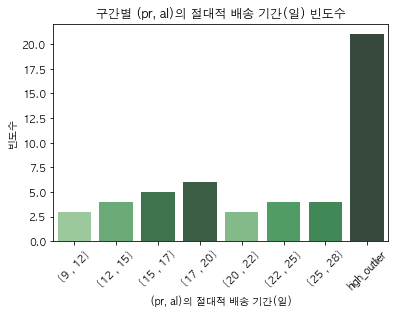

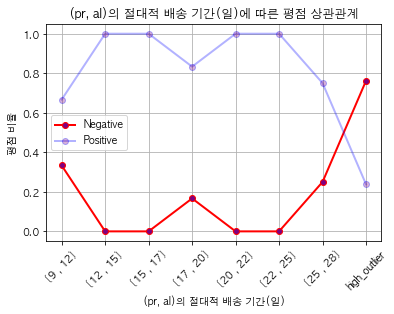

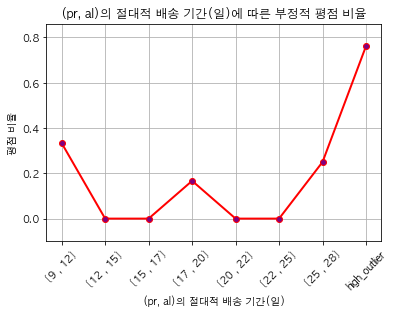

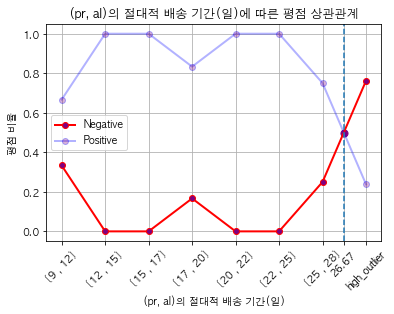

[7.469690443831017, 10.402690443831016, 13.335690443831016, 16.268690443831012, 19.201690443831012, 22.134690443831012, 25.067690443831008, 28.000690443831008, 53.53705437849537]
['[7 , 10]', '[10 , 13]', '[13 , 16]', '[16 , 19]', '[19 , 22]', '[22 , 25]', '[25 , 28]', 'high_outlier']


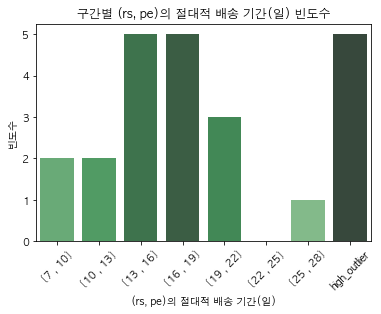

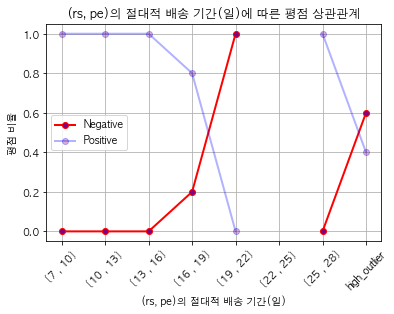

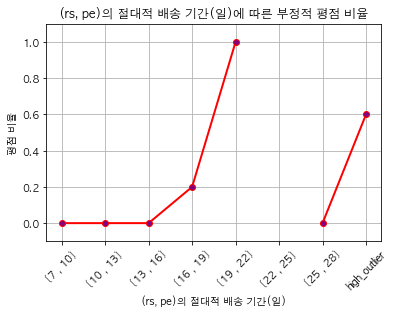

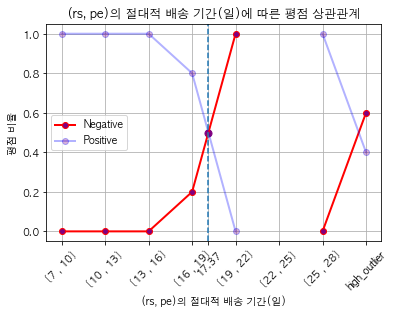

[4.191668426539352, 7.592668426539352, 10.993668426539351, 14.39466842653935, 17.79566842653935, 21.19666842653935, 24.59766842653935, 27.99866842653935, 31.39966842653935, 63.97906729350694]
['[4 , 7]', '[7 , 10]', '[10 , 14]', '[14 , 17]', '[17 , 21]', '[21 , 24]', '[24 , 27]', '[27 , 31]', 'high_outlier']


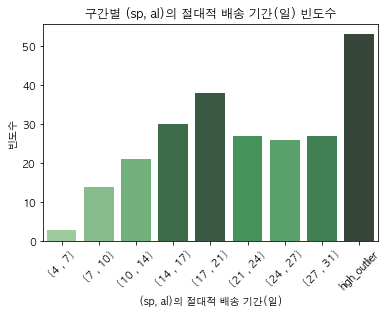

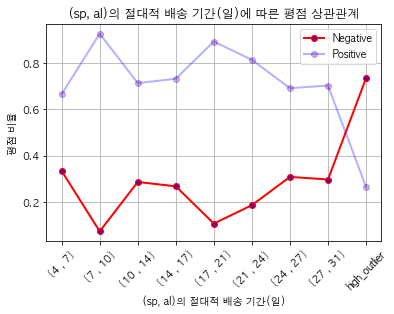

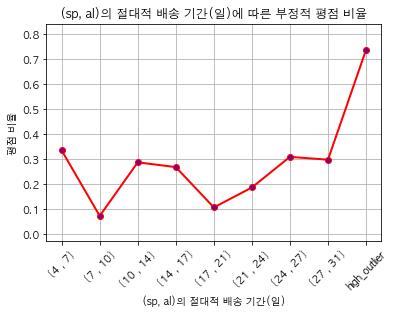

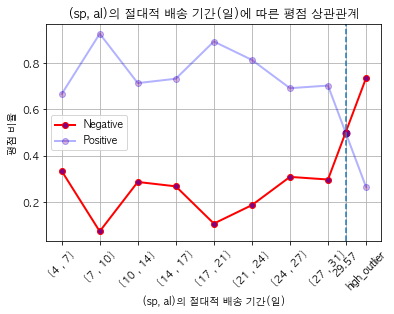

[10.177682732997683, 12.600682732997683, 15.023682732997683, 17.446682732997683, 19.86968273299768, 22.292682732997683, 24.715682732997685, 27.13868273299768, 29.56168273299768]
['[10 , 12]', '[12 , 15]', '[15 , 17]', '[17 , 19]', '[19 , 22]', '[22 , 24]', '[24 , 27]', 'high_outlier']


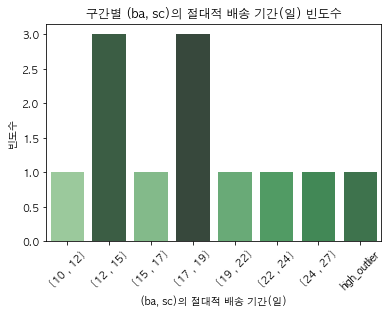

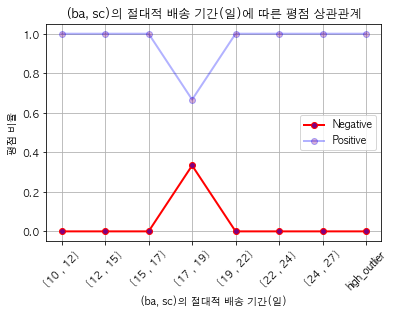

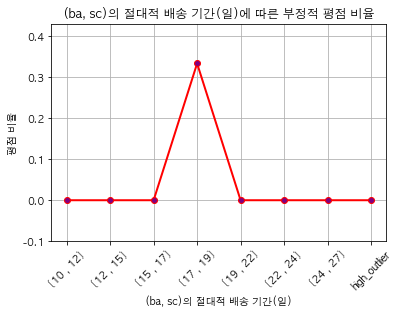

IndexError: single positional indexer is out-of-bounds

In [296]:
int_list_dead = route(top_sel_list_dead, top_cus_list_dead, 2,5,'del_period','pn_review_score',7,0,50,'절대적 배송 기간(일)')
#int_list_dead = route(top_sel_list_dead, top_cus_list_dead, 6,5,'del_period','pn_review_score',7,0,28,'절대적 배송 기간(일)')

In [248]:
int_list_dead

[[24.804706015819743, 0.4999999999999997],
 [16.20394044383102, 0.49999999999999994],
 [29.845754316109897, 0.4999999999999999],
 [16.235182732997686, 0.5000000000000001],
 [26.773886216235702, 0.49999999999999983]]

### - frequency >= 47.5 (75%)

In [259]:
state2_dead47 = state2[state2['frequency'] > 47.5].sort_values('ndead_ratio',ascending=False)

In [260]:
top_sel_list_dead47 = state2_dead47.sort_values('ndead_ratio',ascending=False)['seller_state'].tolist()
top_cus_list_dead47 = state2_dead47.sort_values('ndead_ratio',ascending=False)['customer_state'].tolist()

In [252]:
state2_dead47.head()

,seller_state,customer_state,frequency,negative_freq,negative_ratio,ydead_freq,ndead_freq,sumdead_freq,ndead_ratio
7,pr,al,55,23,0.418182,35,20,55,0.363636
34,sp,al,248,87,0.350806,185,63,248,0.254032
45,sp,ma,514,181,0.352140,390,124,514,0.241245
221,sc,ba,87,27,0.310345,68,19,87,0.218391
37,sp,se,192,62,0.322917,154,38,192,0.197917


In [253]:
state2_dead47['ndead_ratio'].describe()

count    97.000000
mean      0.105250
std       0.058318
min       0.016393
25%       0.059322
50%       0.095571
75%       0.140351
max       0.363636
Name: ndead_ratio, dtype: float64

[9.836010363645833, 14.377010363645834, 18.918010363645834, 23.459010363645834, 28.000010363645835, 77.73115425858795]
['[9 , 14]', '[14 , 18]', '[18 , 23]', '[23 , 28]', 'high_outlier']


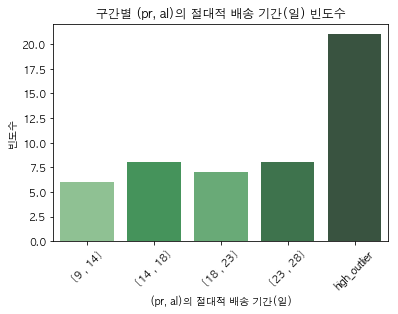

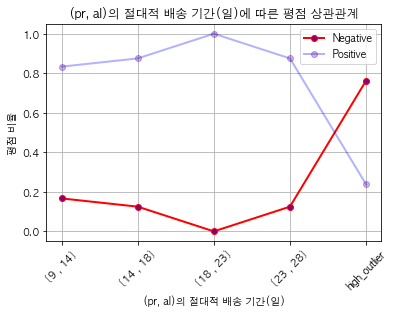

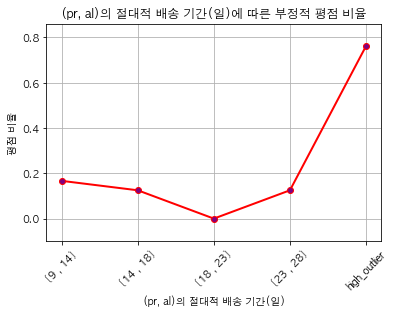

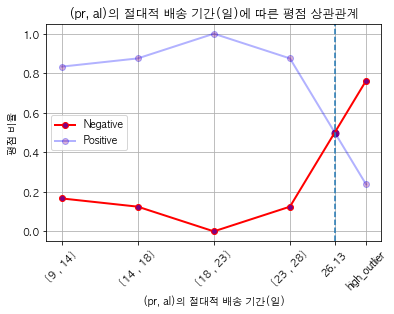

[4.191668426539352, 10.143668426539353, 16.095668426539355, 22.047668426539353, 27.999668426539355, 33.95166842653936, 63.97906729350694]
['[4 , 10]', '[10 , 16]', '[16 , 22]', '[22 , 27]', '[27 , 33]', 'high_outlier']


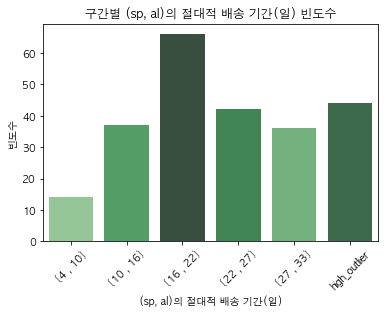

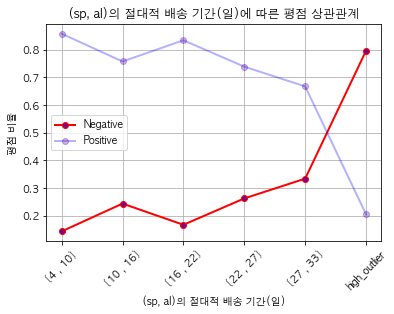

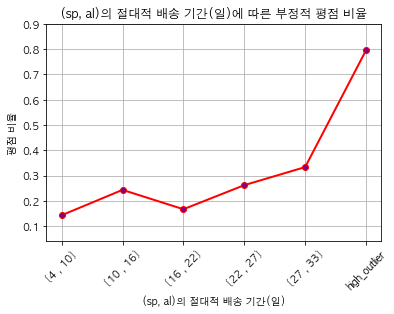

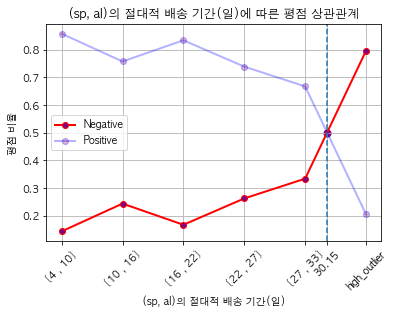

[6.275543519606483, 11.706543519606484, 17.137543519606485, 22.568543519606486, 27.999543519606487, 33.43054351960649, 96.05362833299769]
['[6 , 11]', '[11 , 17]', '[17 , 22]', '[22 , 27]', '[27 , 33]', 'high_outlier']


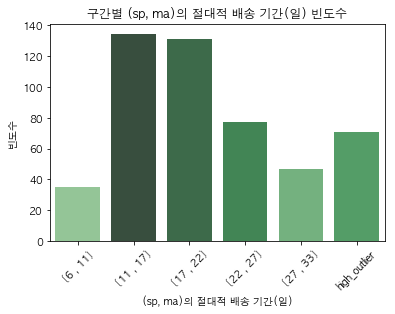

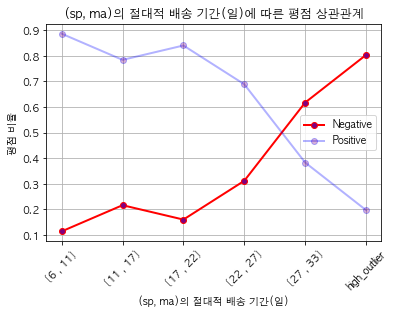

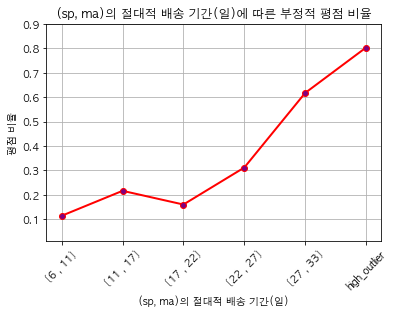

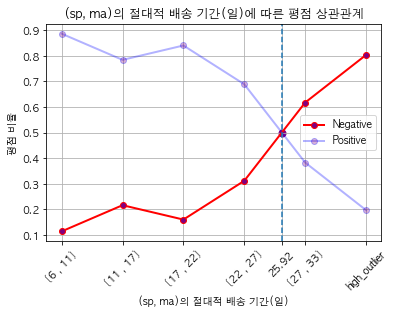

[5.363623432083333, 11.022623432083332, 16.68162343208333, 22.34062343208333, 27.99962343208333, 33.65862343208333, 126.007821461875]
['[5 , 11]', '[11 , 16]', '[16 , 22]', '[22 , 27]', '[27 , 33]', 'high_outlier']


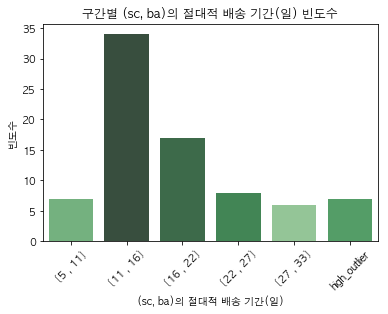

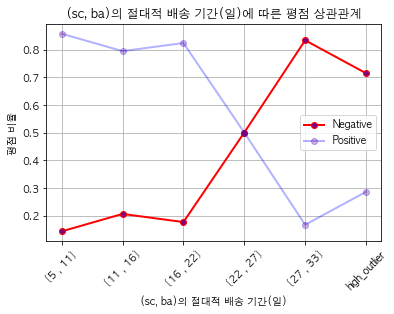

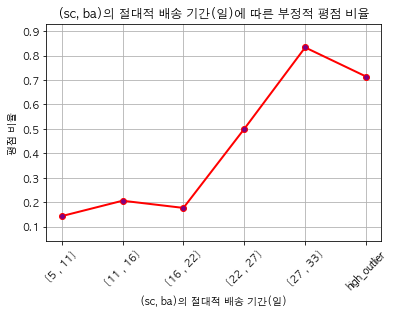

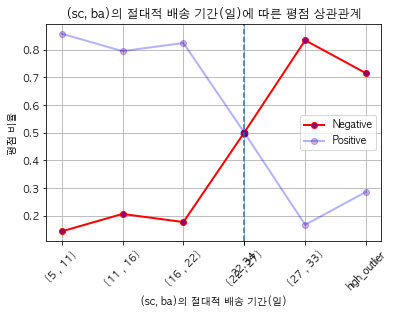

[6.826881973425926, 12.119881973425926, 17.412881973425925, 22.705881973425928, 27.998881973425927, 33.29188197342592, 188.1346248927662]
['[6 , 12]', '[12 , 17]', '[17 , 22]', '[22 , 27]', '[27 , 33]', 'high_outlier']


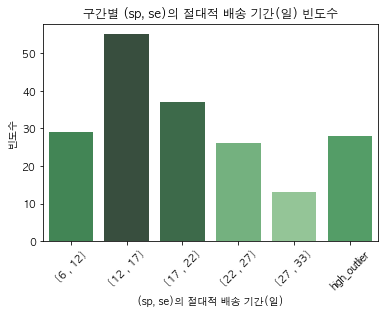

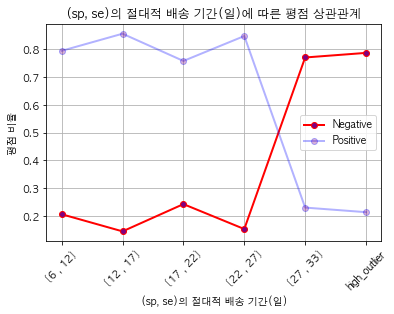

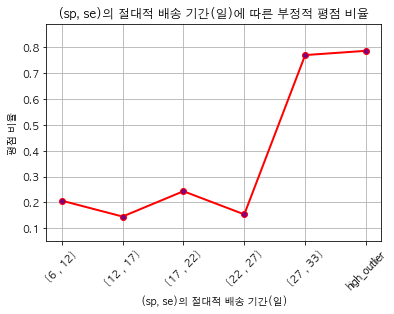

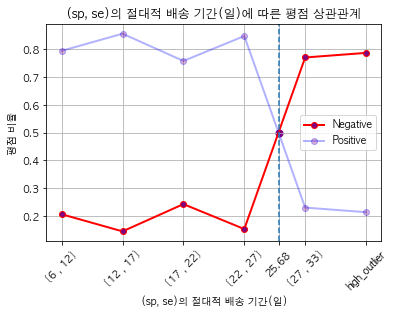

In [298]:
#int_list_dead47 = route(top_sel_list_dead47, top_cus_list_dead47, 3,5,'del_period','pn_review_score',7,0,50,'절대적 배송 기간(일)')
int_list_dead47 = route(top_sel_list_dead47, top_cus_list_dead47, 33,5,'del_period','pn_review_score',4,0,28,'절대적 배송 기간(일)')

In [255]:
int_list_dead47

[[24.804706015819743, 0.4999999999999997],
 [29.845754316109897, 0.4999999999999999],
 [26.773886216235702, 0.49999999999999983],
 [22.03078252299242, 0.49999999999999994],
 [26.872881973425926, 0.4999999999999997]]

# 4. 배송 기한이 긴 것

In [28]:
state4 = state_cor

In [263]:
state4.head()

,seller_state,customer_state,frequency,negative_freq,negative_ratio,comb
0,pr,pr,718,105,0.146240,"pr , pr"
1,pr,mg,797,164,0.205772,"pr , mg"
2,pr,es,121,18,0.148760,"pr , es"
3,pr,sp,2652,527,0.198718,"pr , sp"
4,pr,rj,929,264,0.284177,"pr , rj"


## [state4 조합 테이블 생성]

In [29]:

cusstate = total['customer_state'].unique()
selstate = total['seller_state'].unique()
node1 = []
node2 = []
wgt = []
ngt = []
ngt_ratio = []

del_mean = []

for sel in selstate:
    for cus in cusstate:
        node1.append(sel)
        node2.append(cus)
        df = total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel)
        freq = len(df)
        ngt_freq = len(total.query('(customer_state == "%s")'%cus + "&" + '(seller_state == "%s")'%sel+
                                   "&" + '(pn_review_score == "%s")'%'Negative'))
        
        
        wgt.append(freq)
        ngt.append(ngt_freq)
        
        
        if freq==0:
            ngt_ratio.append(0)
        else:
            ngt_ratio.append(ngt_freq/freq)
        
        
        ## 평균 배송 기간 관련
        del_mean.append(df['del_period'].mean())

In [30]:
total.query('(customer_state == "%s")'%'sp' + "&" + '(seller_state == "%s")'%'sp')['del_period'].mean()

8.342758337858282

In [31]:
state4 = pd.DataFrame({ 'seller_state':node1,'customer_state':node2,'frequency':wgt,'negative_freq':ngt, 'negative_ratio':ngt_ratio,'ydead_freq':ydead,'del_mean':del_mean })

In [270]:
state4.sort_values('del_mean',ascending=False).head()

,seller_state,customer_state,frequency,negative_freq,negative_ratio,ydead_freq,del_mean
296,ce,am,1,1,1.0,0,138.877792
417,es,pa,1,1,1.0,0,62.169677
282,ce,pa,1,1,1.0,0,53.348434
182,ba,ac,2,1,0.5,1,45.957625
444,ro,pa,1,0,0.0,1,43.249908


In [32]:
state4 = state4[state4['frequency']!= 0]

### - frequency > 10 

In [59]:
state4_del = state4[state4['frequency'] > 10].sort_values('del_mean',ascending=False)

In [60]:
top_sel_list_del = state4_del.sort_values('del_mean',ascending=False)['seller_state'].tolist()
top_cus_list_del = state4_del.sort_values('del_mean',ascending=False)['customer_state'].tolist()

In [61]:
state4_del.head(10)

,seller_state,customer_state,frequency,negative_freq,negative_ratio,ydead_freq,del_mean
52,sp,rr,34,11,0.323529,29,29.605423
26,pr,am,13,5,0.384615,13,29.579184
231,sc,pb,13,5,0.384615,10,28.850837
107,mg,am,13,2,0.153846,12,28.328771
7,pr,al,55,23,0.418182,35,28.226926
53,sp,am,86,18,0.209302,80,27.237172
19,pr,rn,22,8,0.363636,17,27.033680
93,mg,pa,103,25,0.242718,90,27.009367
98,mg,mt,65,23,0.353846,55,26.485884
174,ba,pa,14,8,0.571429,12,26.050012


[6.7429999300925925, 12.056999930092593, 17.370999930092594, 22.684999930092594, 27.998999930092594, 33.312999930092595, 172.13952816471058]
['[6 , 12]', '[12 , 17]', '[17 , 22]', '[22 , 27]', '[27 , 33]', 'high_outlier']


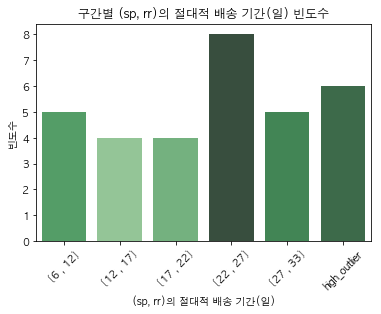

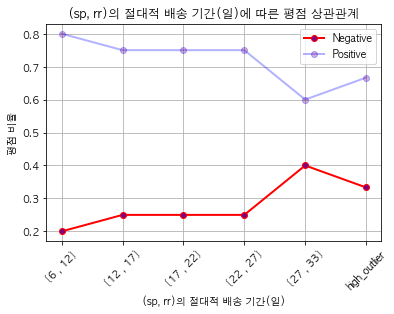

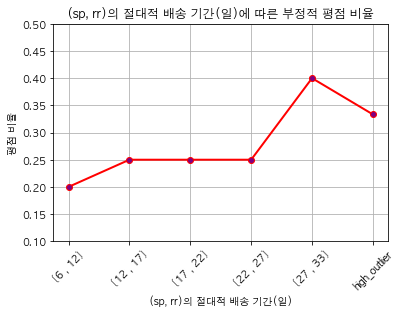

[12.236719299039352, 16.177719299039353, 20.118719299039356, 24.059719299039354, 28.000719299039353, 54.881416159930545]
['[12 , 16]', '[16 , 20]', '[20 , 24]', '[24 , 28]', 'high_outlier']


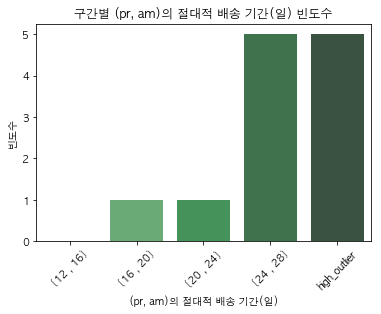

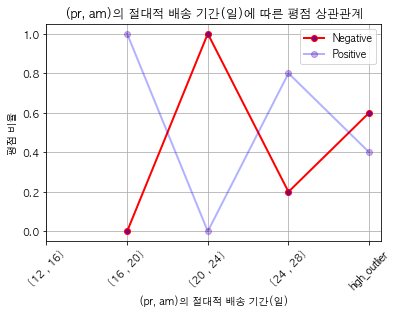

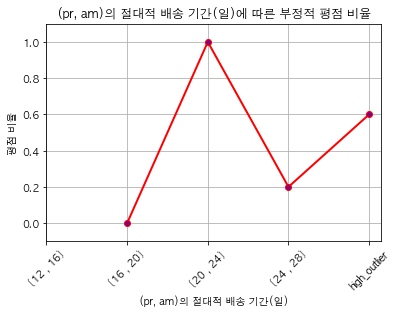

1 2


NameError: name 'int_y' is not defined

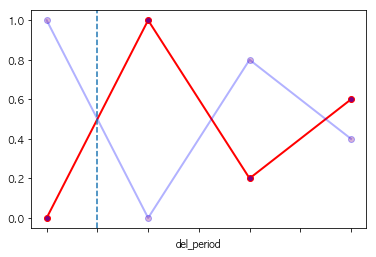

In [62]:
int_list_del = route(top_sel_list_del, top_cus_list_del, 6,5,'del_period','pn_review_score',4,0,28,'절대적 배송 기간(일)')

In [294]:
int_list_del

[[29.4029999300926, 0.5000000000000001],
 [nan, nan],
 [21.44143127799769, 0.5000000000000001],
 [nan, nan],
 [24.804706015819743, 0.4999999999999997]]

### - frequency >= 47.5

In [33]:
state4_del47 = state4[state4['frequency'] >= 20].sort_values('del_mean',ascending=False)

In [34]:
top_sel_list_del47 = state4_del47.sort_values('del_mean',ascending=False)['seller_state'].tolist()
top_cus_list_del47 = state4_del47.sort_values('del_mean',ascending=False)['customer_state'].tolist()

In [35]:
state4_del47.head(10)

,seller_state,customer_state,frequency,negative_freq,negative_ratio,ydead_freq,del_mean
52,sp,rr,34,11,0.323529,29,29.605423
7,pr,al,55,23,0.418182,35,28.226926
53,sp,am,86,18,0.209302,80,27.237172
19,pr,rn,22,8,0.363636,17,27.033680
93,mg,pa,103,25,0.242718,90,27.009367
98,mg,mt,65,23,0.353846,55,26.485884
14,pr,ce,67,23,0.343284,56,24.973491
120,rj,pa,24,3,0.125000,21,24.733604
34,sp,al,248,87,0.350806,185,24.693213
12,pr,pa,56,13,0.232143,46,24.071397


In [36]:
state4['del_mean'].describe()

count    385.000000
mean      17.807173
std        9.326625
min        3.097714
25%       13.018349
50%       16.534960
75%       21.023664
max      138.877792
Name: del_mean, dtype: float64

[6.7429999300925925, 12.056999930092593, 17.370999930092594, 22.684999930092594, 27.998999930092594, 33.312999930092595, 172.13952816471058]
['[6 , 12]', '[12 , 17]', '[17 , 22]', '[22 , 27]', '[27 , 33]', 'high_outlier']


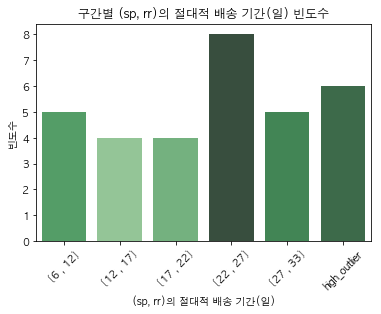

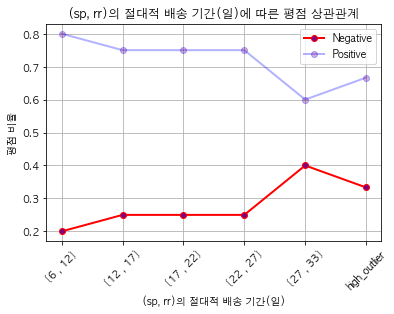

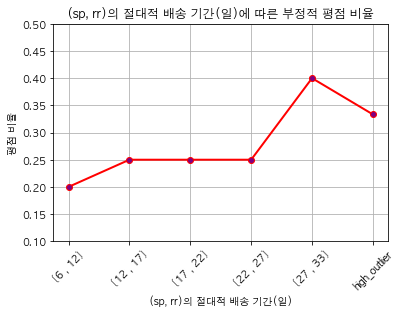

[9.836010363645833, 14.377010363645834, 18.918010363645834, 23.459010363645834, 28.000010363645835, 77.73115425858795]
['[9 , 14]', '[14 , 18]', '[18 , 23]', '[23 , 28]', 'high_outlier']


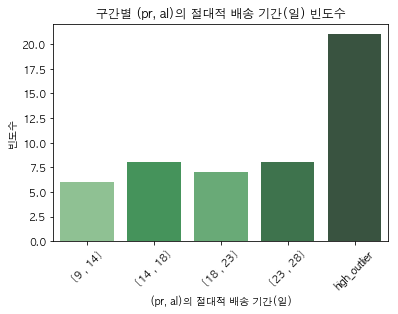

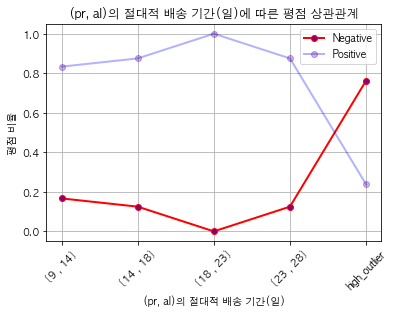

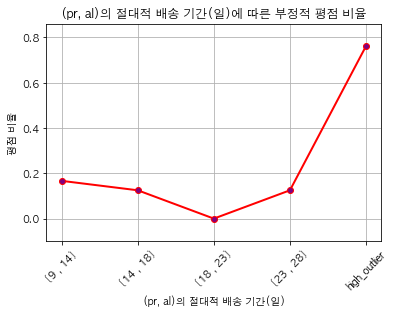

3 4


NameError: name 'int_y' is not defined

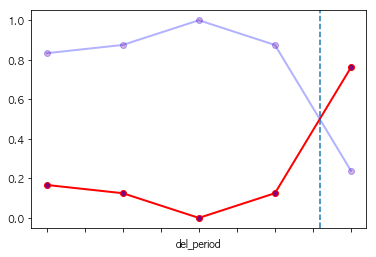

In [49]:
int_list_del47 = route(top_sel_list_del47, top_cus_list_del47, 5,5,'del_period','pn_review_score',4,0,28,'절대적 배송 기간(일)')

In [293]:
int_list_del47

[[24.804706015819743, 0.4999999999999997],
 [45.84816394362269, 0.5],
 [38.77957818263889, 0.5],
 [28.012972739166667, 0.5],
 [26.148394391319442, 0.4999999999999998]]